<h1>Gradient Descent</h1>

<h2>Optimization, Problem Description</h2>

Suppose we have a cost function $ J(\theta) $ and we want to find $ \theta $ which minimize the function

In [4]:
from matplotlib import pyplot as plt
import math
import numpy as np

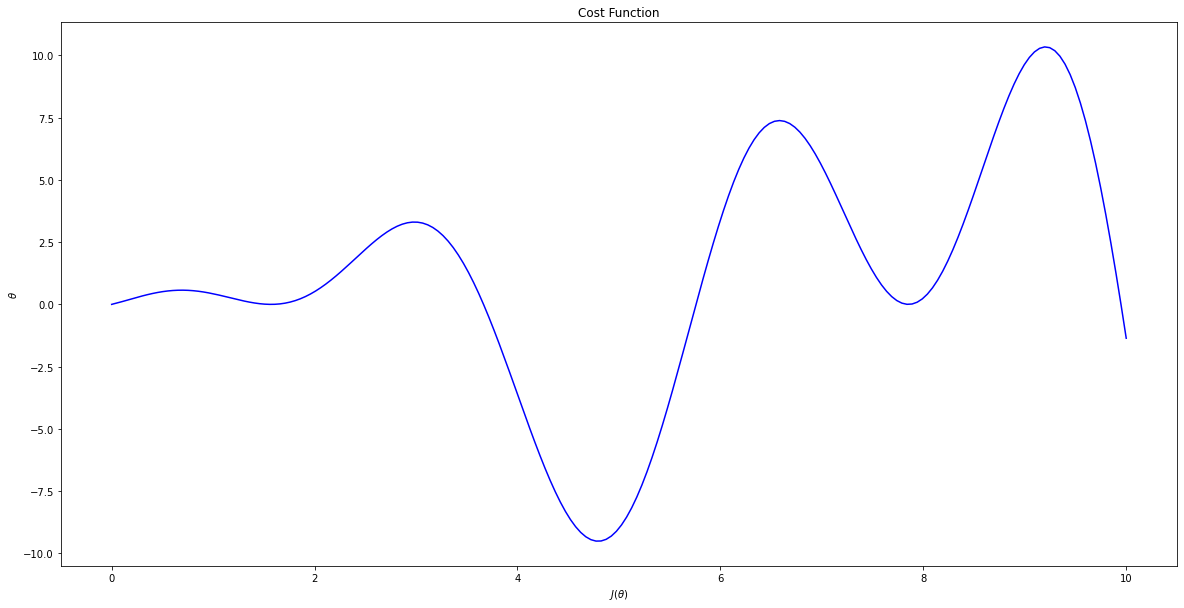

In [15]:
plt.figure(figsize=(20,10))
plt.title("Cost Function")
plt.xlabel(r"$J( \theta )$")
plt.ylabel(r"$\theta$")
x_plot = np.linspace(0, 10, 200)
y_plot = x_plot * np.sin(x_plot) + x_plot * np.cos(2 * x_plot)
plt.plot(x_plot, y_plot, color="b")
plt.show()

<p>In analytical approaches we should take derivative (gradient) of the cost function and find the roots of the derivitive functions. However for most of the functions this approach is not practical since finding the roots analytically is not possible</p>

$$
J(\theta) = \theta \sin(\theta) + \theta \cos(2\theta) \\
J^{\prime}(\theta)= \sin(\theta) + \theta\cos(\theta) + \cos(2\theta) - 2\theta\sin(2\theta) \\
J^{\prime}(\theta)= 0 \rightarrow \sin(\theta) + \theta\cos(\theta) + \cos(2\theta) - 2\theta\sin(2\theta) = 0
$$

<p>For optimizing these functions there are <b>Iterative(Numerical) Algorithms</b> in which we start with an <b>initial guess</b> and in an iterative manner we improve this guess to reach the minimum<p>

<p> <b>Gradient Descent</b> is one of the most famous optimization algorithm which is very practical in Machine Learning and Deep Learning</p>

<h2> Gradient Descent Steps</h2>

<h4>Let suppose we want to find the minimum point of this function:</h4>

<img src="images/gradient_descent_1.png" alt="Gradinet Descent" width="500" height="500">

<h4> Step 1: Start with an initial guess (it can be random but there are wiser choices
</h4>